# K-Nearest Neighbors

## 1. Load Wine dataset

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_wine

In [0]:
data, target = load_wine(True)

In [4]:
type(data), type(target)

(numpy.ndarray, numpy.ndarray)

In [5]:
data.shape, target.shape

((178, 13), (178,))

## 2. Select the first two attributes for a 2D representation of the image


In [6]:
data = data[:, :2]
data.shape

(178, 2)

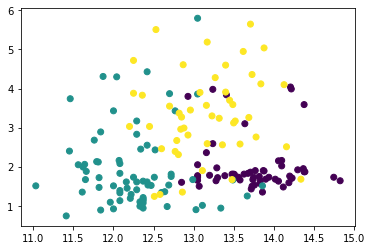

In [7]:
plt.scatter(data[:, 0], data[:, 1], c=target)

## 3. Randomly split data into train, validation and test sets in proportion 5:2:3

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=0
)

In [0]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.6, random_state=0
)

In [11]:
len(y_train), len(y_val), len(y_test)

(89, 35, 54)

## 4. For K = [1,3, 5,7]

a. Apply K-Nearest Neighbors

b. Plot the data and the decision boundaries

c. Evaluate the method on the validation set


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [0]:
lc1 = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
lc2 = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [0]:
K_list = [1, 3, 5, 7]
accuracies = []
clf_list = []

In [0]:
def plot_boundary(func, points, labels):
    x_min = X_train[:, 0].min() - .5
    x_max = X_train[:, 0].max() + .5
    y_min = X_train[:, 1].min() - .5
    y_max = X_train[:, 1].max() + .5
    h = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = func.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=lc1)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=lc2)

In [0]:
def K_KNN(K):
    clf = KNeighborsClassifier(K)
    clf.fit(X_train, y_train)
    clf_list.append(clf)
    plot_boundary(clf, X_train, y_train)
    y_val_predicted = clf.predict(X_val)
    accuracy = np.mean(y_val_predicted == y_val) * 100
    accuracies.append(accuracy)

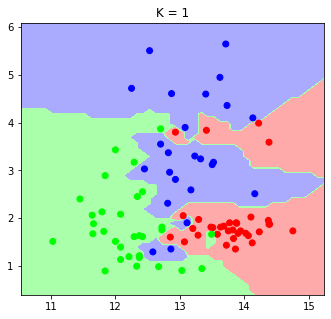

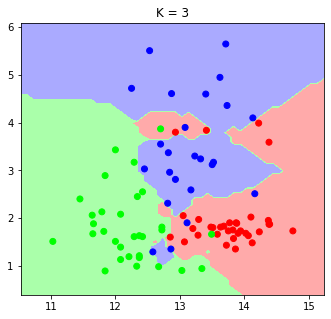

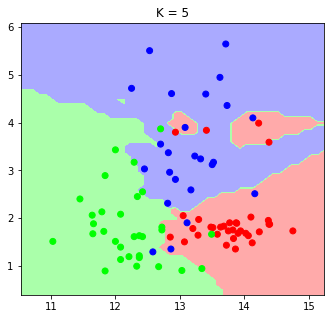

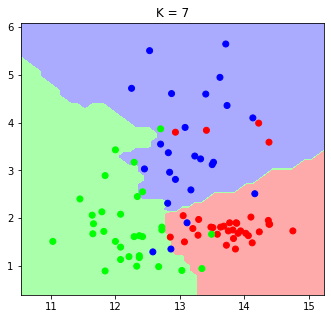

In [17]:
for i in range(len(K_list)):
    plt.figure(figsize=(25, 5))
    plt.subplot(1, len(K_list), i+1)
    plt.title('K = %d' % K_list[i])
    K_KNN(K_list[i])

## 5. Plot a graph showing how the accuracy on the validation set varies when changing K

In [18]:
accuracies

[74.28571428571429, 77.14285714285715, 82.85714285714286, 80.0]

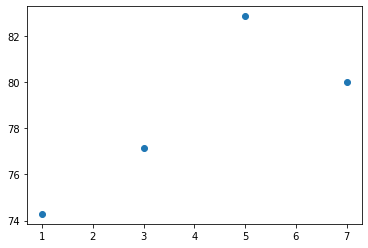

In [19]:
plt.scatter(K_list, accuracies)

## 6. How the boundaries change? Why?

---



When K is too small, neighborhood of each point is very small, which can lead to overfitting. Therefore, the boundary is easy to be disturbed by noise and outliers.

As K increases, the boundary becomes simpler has more powerful generalization capabilities. However, if K is too large, points of different labels become its neighbors and the accuracy will become lower.

## 7. Use the best value of K and evaluate the model on the test set. How well does it works?

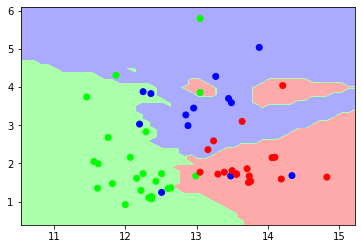

In [20]:
y_test_predicted = clf_list[2].predict(X_test)
plot_boundary(clf_list[2], X_test, y_test)

In [21]:
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

75.92592592592592

# Linear SVM

## 8.  For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:

a.  Train a linear SVM on the training set

b. Plot the data and the decision boundaries 

c. Evaluate the method on the validation set

In [0]:
from sklearn import svm

In [0]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = []
clf_list = []

In [0]:
def plot_boundary(func, points, labels):
    x_min = X_train[:, 0].min() - .5
    x_max = X_train[:, 0].max() + .5
    y_min = X_train[:, 1].min() - .5
    y_max = X_train[:, 1].max() + .5
    h = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = func.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=lc1)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=lc2)

In [0]:
def C_SVM(C):
    clf = svm.SVC(C, kernel='linear')
    clf.fit(X_train, y_train)
    clf_list.append(clf)
    plot_boundary(clf, X_train, y_train)
    y_val_predicted = clf.predict(X_val)
    accuracy = np.mean(y_val_predicted == y_val) * 100
    accuracies.append(accuracy)

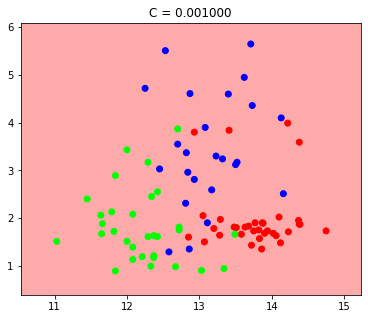

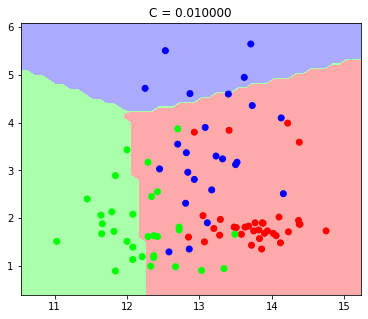

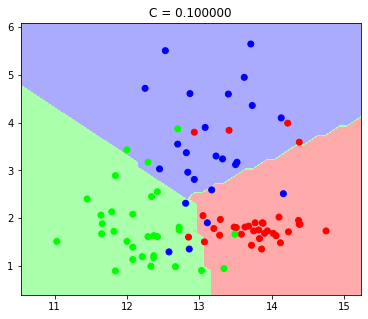

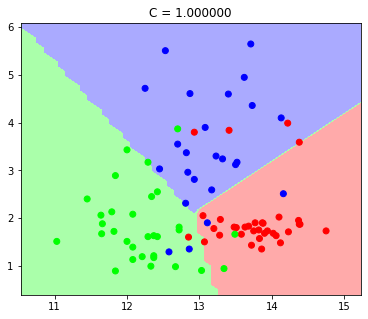

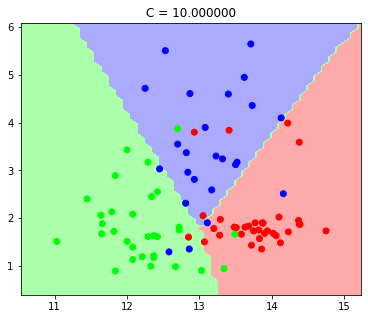

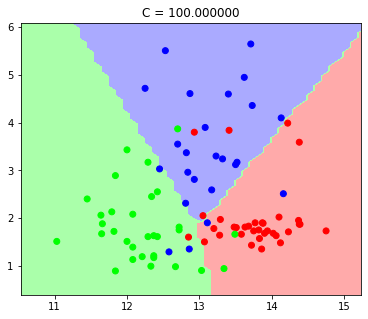

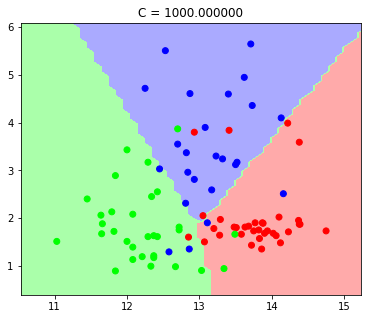

In [26]:
for i in range(len(C_list)):
    plt.figure(figsize=(50, 5))
    plt.subplot(1, len(C_list), i+1)
    plt.title('C = %f' % C_list[i])
    C_SVM(C_list[i])

##  9.  Plot a graph showing how the accuracy on the validation set varies when changing C

In [27]:
accuracies

[20.0,
 40.0,
 68.57142857142857,
 71.42857142857143,
 71.42857142857143,
 71.42857142857143,
 71.42857142857143]

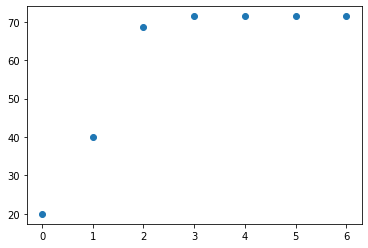

In [28]:
plt.scatter(range(len(C_list)), accuracies)

## 10.  How the boundaries change? Why?

---



The larger the value of C, the less willing the classifier is to allow outliers

## 11.  Use the best value of C and evaluate the model on the test set. How well does it works?

In [29]:
y_test_predicted = clf_list[3].predict(X_test)
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

79.62962962962963

In [30]:
y_test_predicted = clf_list[4].predict(X_test)
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

83.33333333333334

In [31]:
y_test_predicted = clf_list[5].predict(X_test)
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

83.33333333333334

In [32]:
y_test_predicted = clf_list[6].predict(X_test)
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

83.33333333333334

# RBF Kernel

## 12. Repeat point 8. (train, plot, etc..), but this time use an RBF kernel

In [0]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = []
clf_list = []

In [0]:
def C_SVM_rbf(C):
    clf = svm.SVC(C, kernel='rbf')
    clf.fit(X_train, y_train)
    clf_list.append(clf)
    plot_boundary(clf, X_train, y_train)
    y_val_predicted = clf.predict(X_val)
    accuracy = np.mean(y_val_predicted == y_val) * 100
    accuracies.append(accuracy)

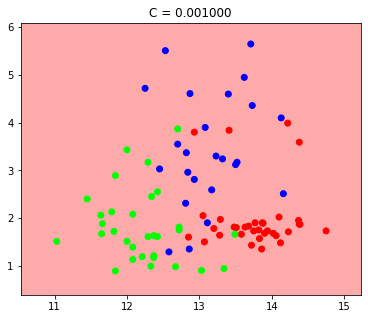

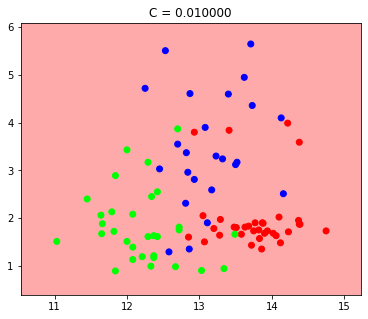

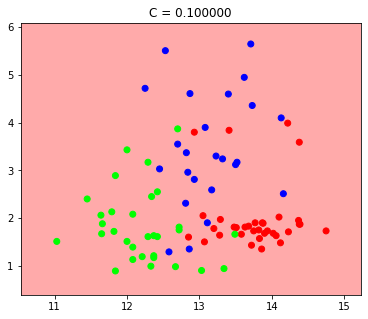

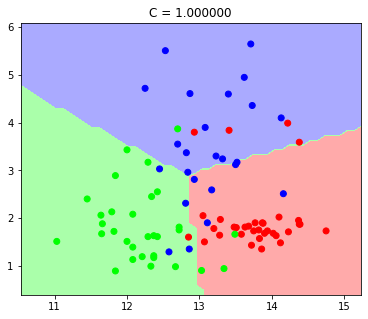

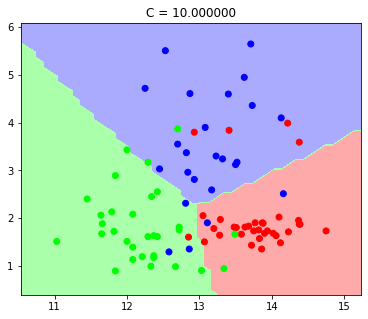

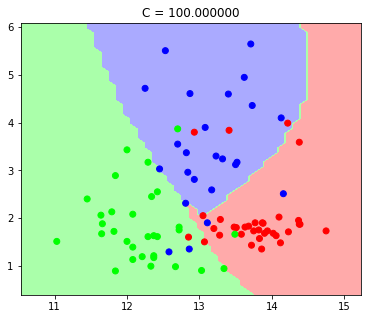

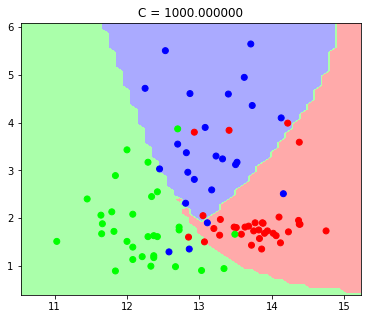

In [35]:
for i in range(len(C_list)):
    plt.figure(figsize=(50, 5))
    plt.subplot(1, len(C_list), i+1)
    plt.title('C = %f' % C_list[i])
    C_SVM_rbf(C_list[i])

## 13.   Evaluate the best C on the test set

In [36]:
accuracies

[20.0,
 20.0,
 20.0,
 60.0,
 71.42857142857143,
 68.57142857142857,
 77.14285714285715]

In [37]:
y_test_predicted = clf_list[6].predict(X_test)
accuracy = np.mean(y_test_predicted == y_test) * 100
accuracy

81.48148148148148

## 14.   Are there any differences compared to the linear kernel? How are the boundaries different?

The boundaries become non-linear because of the kernel.

## 15.   Perform a grid search of the best parameters for an RBF kernel: we will now tune both gamma and C at the same time. 

### Select an appropriate range for both parameters.

In [38]:
# value of gamma='scale' in SVC
1 / (X_train.shape[0] * X_train.var())

0.000377073287583712

In [39]:
# value of gamma='auto' in SVC
1 / (X_train.shape[0])

0.011235955056179775

### Train the model and score it on the validation set.

In [0]:
best_score = 0
for gamma in [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1]:
    for C in [0.1, 1, 10, 100, 1000]:
        clf = svm.SVC(gamma=gamma,C=C)
        clf.fit(X_train,y_train)
        score = clf.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
            best_clf = clf

### Evaluate the best parameters on the test set.

---



In [41]:
best_score, best_parameters

(0.8571428571428571, {'C': 1000, 'gamma': 0.1})

In [42]:
best_clf.score(X_test, y_test)

0.7777777777777778

Plot the decision boundaries.

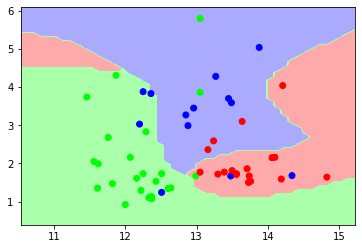

In [43]:
plot_boundary(best_clf, X_test, y_test)

# K-Fold

### 16.   Merge the training and validation split. You should now have 70% training and 30% test data.

In [44]:
X_train.shape, X_val.shape

((89, 2), (35, 2))

In [45]:
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)
X_train.shape, y_train.shape

((124, 2), (124,))

## 17.   Repeat the grid search for gamma  and C but this time perform 5-fold validation.

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
params = {
    "gamma": [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1],
    "C": [0.1, 1, 10, 100, 1000]
}

In [0]:
grid = GridSearchCV(svm.SVC(), params, cv=5)

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### 18.   Evaluate the parameters on the test set. Is the final score different? Why?

In [50]:
grid.best_score_, grid.best_params_

(0.8226666666666667, {'C': 1000, 'gamma': 0.1})

In [51]:
grid.score(X_test, y_test)

0.7777777777777778

# Extra : only once you finish the main requests

### 19.  Discuss the difference between KNN and SVM

1. SVM is less affected by outliers than KNN
2. Once SVM is trained, we can quickly predict labels, while we don't have a training phase on KNN and we have to calculate distances with neighbors every time new data comes in

### 20.  Try also with different pairs of attributes 

In [0]:
data, target = load_wine(True)

In [60]:
data = data[:, 5:7]
data.shape

(178, 2)

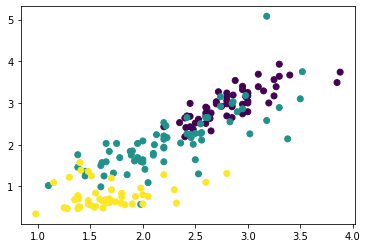

In [61]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, random_state=0
)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 2), (54, 2), (124,), (54,))

In [0]:
params = {
    "gamma": [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1],
    "C": [0.1, 1, 10, 100, 1000]
}

In [0]:
grid = GridSearchCV(svm.SVC(), params, cv=5)

In [67]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
grid.best_score_, grid.best_params_

(0.7993333333333333, {'C': 1000, 'gamma': 1})

In [69]:
grid.score(X_test, y_test)

0.7592592592592593

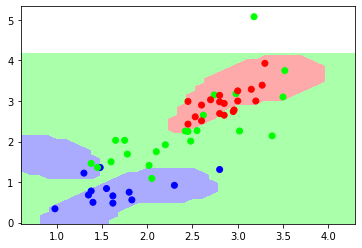

In [70]:
plot_boundary(grid.best_estimator_, X_test, y_test)